# ML practical exam

Problem statement: Classify HR promotiion dataset into Promoted and anot Promoted classes using decision Tree classifier

In [1]:
import io

In [2]:
from google.colab import files
uploaded = files.upload()

# Print the keys in the uploaded dictionary
print("Keys in uploaded:", uploaded.keys())

Saving HR Promotion.csv to HR Promotion.csv
Keys in uploaded: dict_keys(['HR Promotion.csv'])


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv(io.BytesIO(uploaded['HR Promotion.csv']))
print("Head of the dataset:\n", df.head())

Head of the dataset:
    employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0    

In [4]:
null_values = df.isnull().sum()

# Print the columns with null values and their counts
print("Null Values in Each Column:")
print(null_values)

# If you want to check the percentage of missing values, you can also do this:
null_percentage = (df.isnull().mean() * 100)
print("\nPercentage of Missing Values in Each Column:")
print(null_percentage)


Null Values in Each Column:
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Percentage of Missing Values in Each Column:
employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64


Considering missing education values are little, we can remove them. However we replace missing prev year rating with the median

In [5]:
# 1. Remove rows where 'education' column has missing values
df = df.dropna(subset=['education'])

# 2. Fill missing values in the 'previous_year_rating' column with the median
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())

# Check if there are any remaining missing values
null_values = df.isnull().sum()

# Print the updated null value counts to verify the changes
print("Null Values after Data Cleaning:")
print(null_values)


Null Values after Data Cleaning:
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


<ipython-input-5-35ec35700390>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import export_text

# 2. Encode categorical variables using LabelEncoder
label_encoders = {}  # To store encoders for each categorical column
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Define features (X) and target (y)
X = df.drop(columns=['employee_id', 'is_promoted'])  # Drop non-relevant columns
y = df['is_promoted']  # Target variable

# 4. Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Create and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 6. Predict the target variable on the test set
y_pred = clf.predict(X_test)

# 7. Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 8. Display the rules of the trained decision tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)


Accuracy: 0.888676844783715
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     14356
           1       0.38      0.43      0.40      1364

    accuracy                           0.89     15720
   macro avg       0.66      0.68      0.67     15720
weighted avg       0.90      0.89      0.89     15720

Decision Tree Rules:
 |--- avg_training_score <= 90.50
|   |--- KPIs_met >80% <= 0.50
|   |   |--- awards_won? <= 0.50
|   |   |   |--- previous_year_rating <= 4.50
|   |   |   |   |--- avg_training_score <= 61.50
|   |   |   |   |   |--- avg_training_score <= 57.50
|   |   |   |   |   |   |--- avg_training_score <= 54.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- avg_training_score >  54.50
|   |   |   |   |   |   |   |--- department <= 5.50
|   |   |   |   |   |   |   |   |--- region <= 30.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- region

In [9]:
# Print the ranking of feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to show feature importances in a readable way
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of most important features
print("Ranking of Features based on Importance:")
for rank, (index, row) in enumerate(importance_df.iterrows(), start=1):
    print(f"{rank}. {row['Feature']} (Importance: {row['Importance']:.4f})")


Ranking of Features based on Importance:
1. avg_training_score (Importance: 0.3018)
2. department (Importance: 0.1463)
3. age (Importance: 0.1346)
4. region (Importance: 0.1033)
5. length_of_service (Importance: 0.0908)
6. previous_year_rating (Importance: 0.0582)
7. KPIs_met >80% (Importance: 0.0386)
8. recruitment_channel (Importance: 0.0337)
9. gender (Importance: 0.0297)
10. no_of_trainings (Importance: 0.0272)
11. awards_won? (Importance: 0.0200)
12. education (Importance: 0.0157)


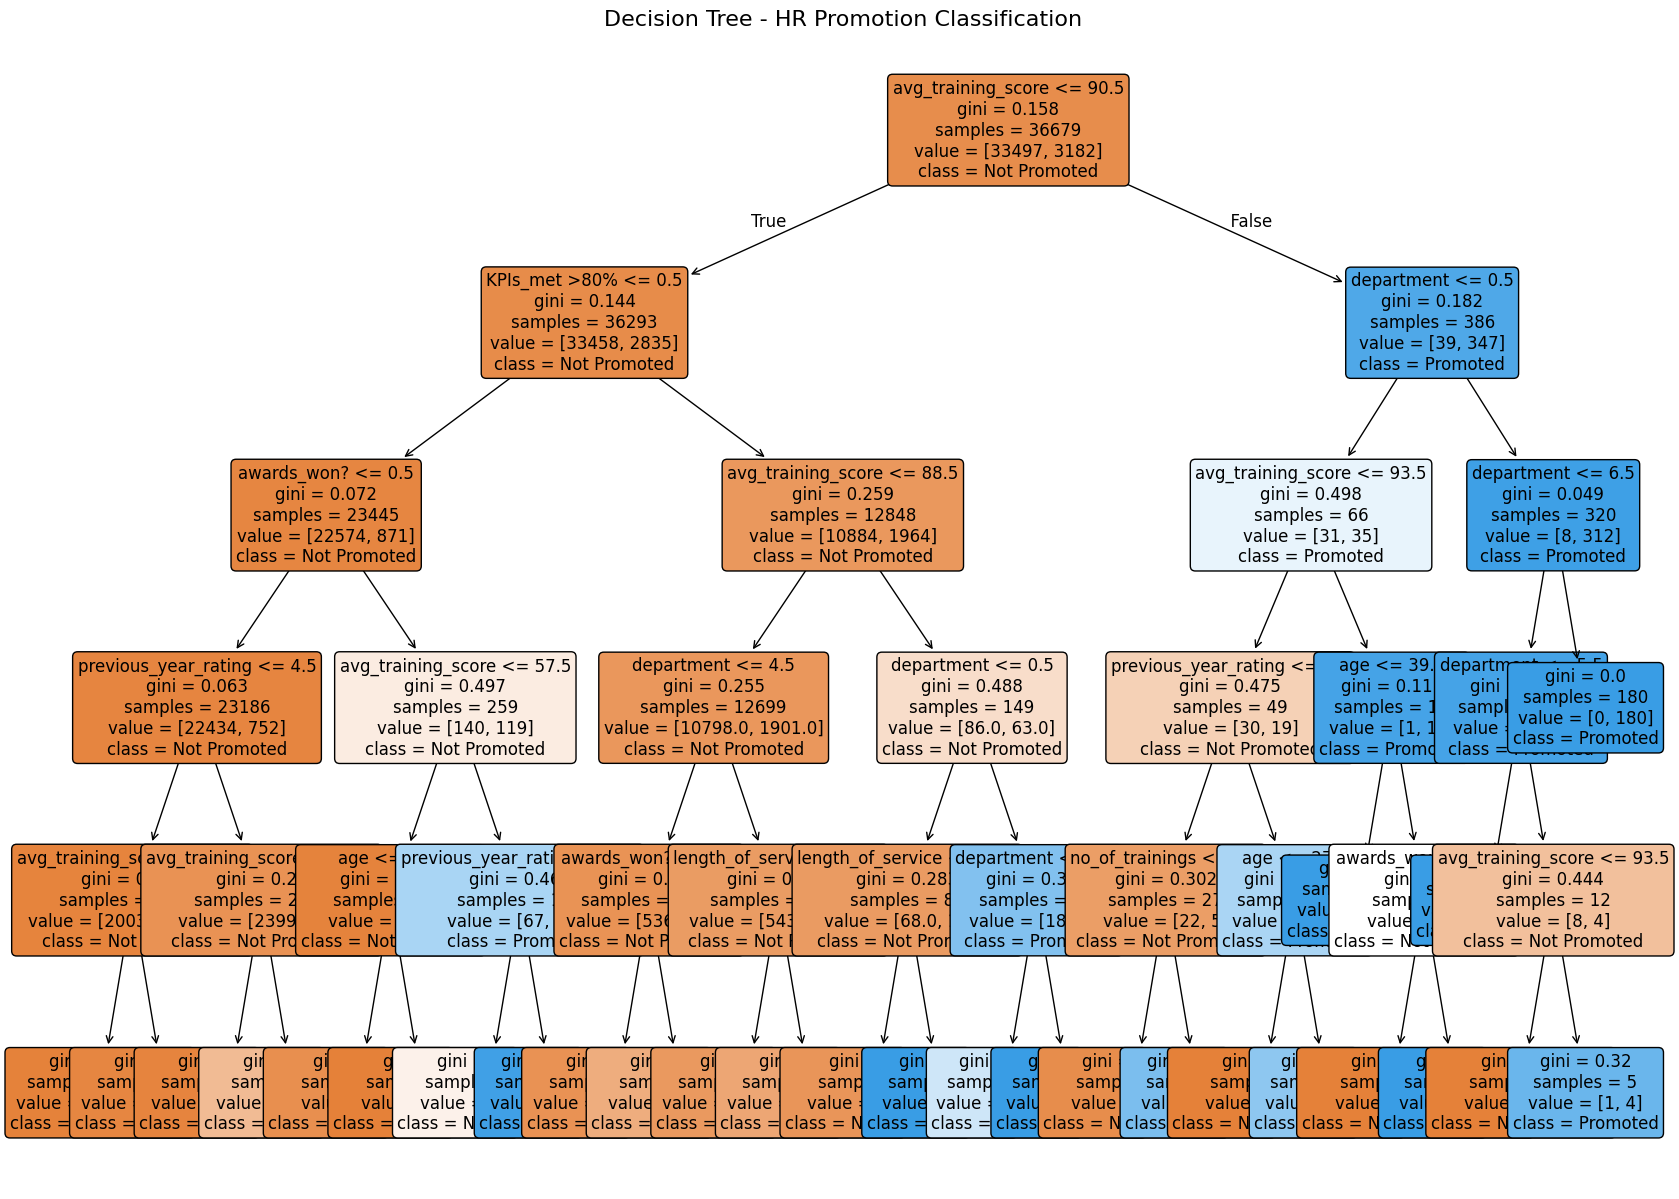

In [13]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Visualize the trained decision tree
plt.figure(figsize=(20, 15))  # Adjust the figure size to make the tree readable
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Promoted', 'Promoted'], rounded=True, fontsize=12)
plt.title("Decision Tree - HR Promotion Classification", fontsize=16)
plt.show()


Accuracy Before SMOTE: 0.9233
Before SMOTE, class distribution:
is_promoted
0    33497
1     3182
Name: count, dtype: int64
After SMOTE, class distribution:
is_promoted
0    33497
1    33497
Name: count, dtype: int64
Accuracy After SMOTE: 0.8808


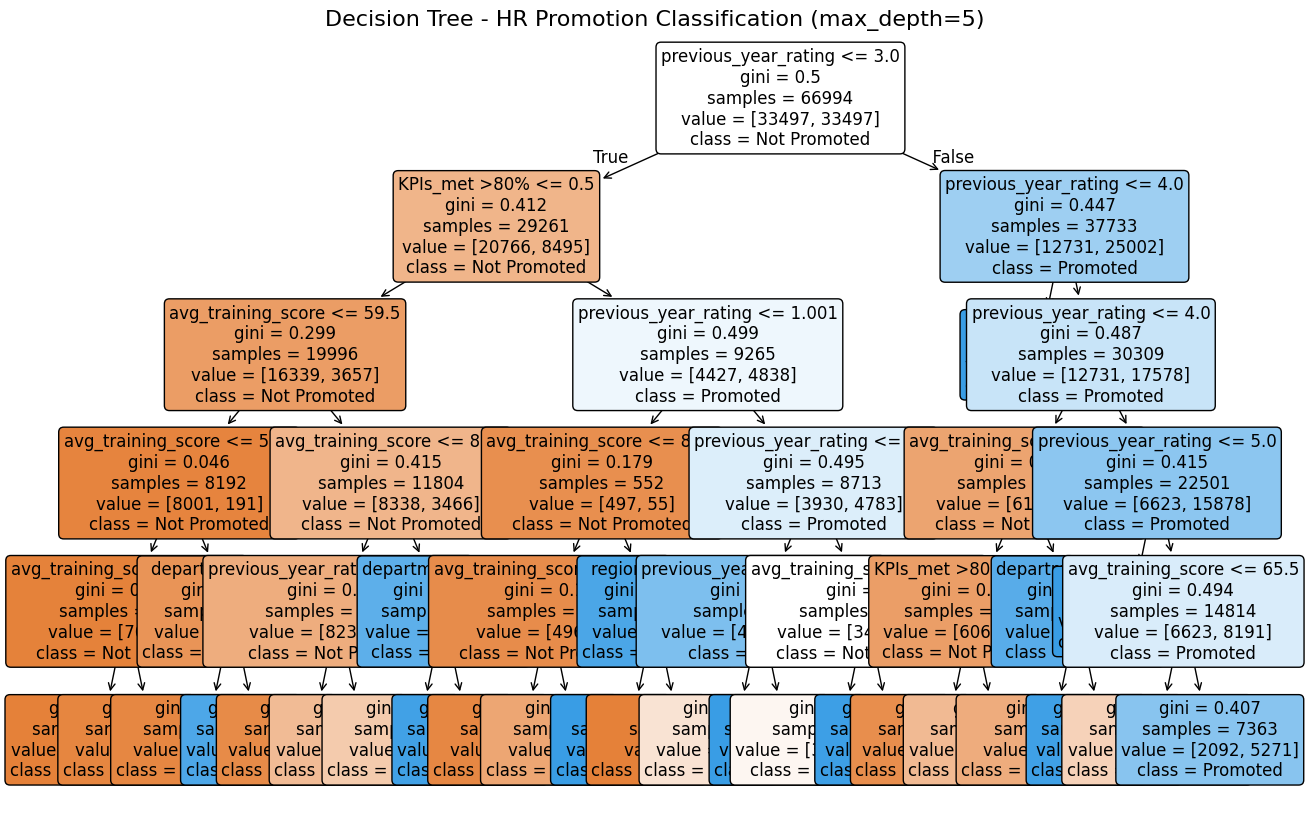

In [16]:
from imblearn.over_sampling import SMOTE
# 4. Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train a Decision Tree Classifier on the original imbalanced dataset (before SMOTE)
clf_before_smote = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_before_smote.fit(X_train, y_train)

# Evaluate the model accuracy on the original data
accuracy_before_smote = clf_before_smote.score(X_test, y_test)
print(f"Accuracy Before SMOTE: {accuracy_before_smote:.4f}")

# 6. Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(f"Before SMOTE, class distribution:\n{y_train.value_counts()}")
print(f"After SMOTE, class distribution:\n{y_train_resampled.value_counts()}")

# 7. Train a Decision Tree Classifier on the resampled dataset (after SMOTE)
clf_after_smote = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_after_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate the model accuracy on the test data
accuracy_after_smote = clf_after_smote.score(X_test, y_test)
print(f"Accuracy After SMOTE: {accuracy_after_smote:.4f}")

# 8. Visualize the trained decision tree after SMOTE
plt.figure(figsize=(15, 10))  # Adjust the figure size to make the tree readable
plot_tree(clf_after_smote, filled=True, feature_names=X.columns, class_names=['Not Promoted', 'Promoted'], rounded=True, fontsize=12)
plt.title("Decision Tree - HR Promotion Classification (max_depth=5)", fontsize=16)
plt.show()


In [17]:
# Evaluate the model accuracy on the original data
accuracy_before_smote = clf_before_smote.score(X_test, y_test)
print(f"Accuracy Before SMOTE: {accuracy_before_smote:.4f}")

# 6. Get precision, recall, f1-score for the model before SMOTE
y_pred_before_smote = clf_before_smote.predict(X_test)
print("\nClassification Report (Before SMOTE):")
print(classification_report(y_test, y_pred_before_smote))

# 7. Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(f"Before SMOTE, class distribution:\n{y_train.value_counts()}")
print(f"After SMOTE, class distribution:\n{y_train_resampled.value_counts()}")

# 8. Train a Decision Tree Classifier on the resampled dataset (after SMOTE)
clf_after_smote = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_after_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate the model accuracy on the test data
accuracy_after_smote = clf_after_smote.score(X_test, y_test)
print(f"Accuracy After SMOTE: {accuracy_after_smote:.4f}")

# Get precision, recall, f1-score for the model after SMOTE
y_pred_after_smote = clf_after_smote.predict(X_test)
print("\nClassification Report (After SMOTE):")
print(classification_report(y_test, y_pred_after_smote))


Accuracy Before SMOTE: 0.9233

Classification Report (Before SMOTE):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14356
           1       0.89      0.13      0.23      1364

    accuracy                           0.92     15720
   macro avg       0.91      0.57      0.59     15720
weighted avg       0.92      0.92      0.90     15720

Before SMOTE, class distribution:
is_promoted
0    33497
1     3182
Name: count, dtype: int64
After SMOTE, class distribution:
is_promoted
0    33497
1    33497
Name: count, dtype: int64
Accuracy After SMOTE: 0.8808

Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     14356
           1       0.32      0.33      0.32      1364

    accuracy                           0.88     15720
   macro avg       0.63      0.63      0.63     15720
weighted avg       0.88      0.88      0.88     15720



After undersampling (Not Promoted) to 10,000 and applying SMOTE, class distribution:
is_promoted
1    10000
0    10000
Name: count, dtype: int64
Accuracy After Undersampling (Not Promoted to 10,000) + SMOTE: 0.7936

Classification Report (After Undersampling + SMOTE):
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     14356
           1       0.23      0.61      0.34      1364

    accuracy                           0.79     15720
   macro avg       0.59      0.71      0.61     15720
weighted avg       0.89      0.79      0.83     15720



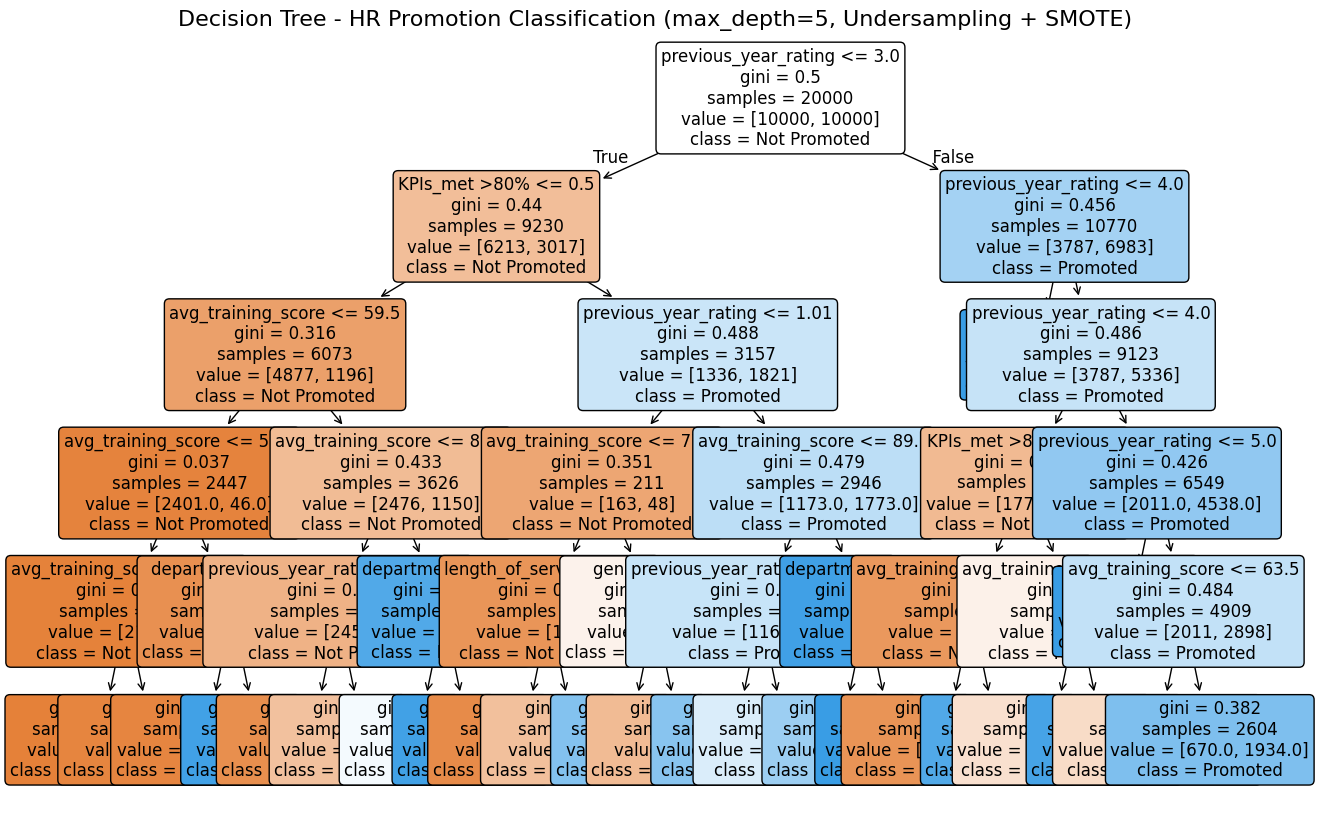

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset from CSV
df = pd.read_csv('HR Promotion.csv')

# 1. Handle missing data
# Remove rows where 'education' column has missing values
df = df.dropna(subset=['education'])

# Fill missing values in 'previous_year_rating' column with the median
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())

# 2. Encode categorical variables using LabelEncoder
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Define features (X) and target (y)
X = df.drop(columns=['employee_id', 'is_promoted'])  # Drop non-relevant columns
y = df['is_promoted']  # Target variable

# 4. Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Undersample the "Not Promoted" class to 10,000 instances
df_train = pd.concat([X_train, y_train], axis=1)
df_not_promoted = df_train[df_train['is_promoted'] == 0]
df_promoted = df_train[df_train['is_promoted'] == 1]

# Downsample the "Not Promoted" class to 10,000 instances (keeping 10,000 rows)
df_not_promoted_undersampled = resample(df_not_promoted,
                                        replace=False,    # Randomly sample without replacement
                                        n_samples=10000,  # Keep 10,000 samples
                                        random_state=42)  # Set random seed for reproducibility

# Combine the undersampled "Not Promoted" class with the "Promoted" class
df_train_undersampled = pd.concat([df_promoted, df_not_promoted_undersampled])

# Shuffle the dataset after combining
df_train_undersampled = df_train_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features (X) and target (y) for the undersampled training set
X_train_undersampled = df_train_undersampled.drop(columns=['is_promoted'])
y_train_undersampled = df_train_undersampled['is_promoted']

# 6. Apply SMOTE to oversample the minority class ("Promoted")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_undersampled, y_train_undersampled)

# Check the class distribution after resampling
print(f"After undersampling (Not Promoted) to 10,000 and applying SMOTE, class distribution:\n{y_train_resampled.value_counts()}")

# 7. Train a Decision Tree Classifier on the resampled dataset (after undersampling + SMOTE)
clf_resampled = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_resampled.fit(X_train_resampled, y_train_resampled)

# Evaluate the model accuracy on the test data
accuracy_resampled = clf_resampled.score(X_test, y_test)
print(f"Accuracy After Undersampling (Not Promoted to 10,000) + SMOTE: {accuracy_resampled:.4f}")

# Get precision, recall, f1-score for the model after undersampling + SMOTE
y_pred_resampled = clf_resampled.predict(X_test)
print("\nClassification Report (After Undersampling + SMOTE):")
print(classification_report(y_test, y_pred_resampled))

# 8. Visualize the trained decision tree after undersampling + SMOTE
plt.figure(figsize=(15, 10))  # Adjust the figure size to make the tree readable
plot_tree(clf_resampled, filled=True, feature_names=X.columns, class_names=['Not Promoted', 'Promoted'], rounded=True, fontsize=12)
plt.title("Decision Tree - HR Promotion Classification (max_depth=5, Undersampling + SMOTE)", fontsize=16)
plt.show()


In [ ]:
c